In [156]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import scipy.stats as stats

In [108]:
df2 = pd.read_csv("Shuttle22.csv", header= None)
df = pd.read_csv("complex9_gn8.txt", header = None,sep=',')

In [153]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

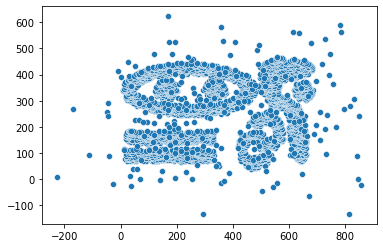

(            0         1
 0     660.976  304.2250
 1     636.213  306.1740
 2     662.753  307.5650
 3     657.487  307.7400
 4     635.273  308.1570
 ...       ...       ...
 3268  728.899  535.6270
 3269  504.528  -46.2297
 3270  373.256  409.0260
 3271  850.838  242.7110
 3272  641.676  347.5440
 
 [3273 rows x 2 columns],
 array([[660.976, 304.225],
        [636.213, 306.174],
        [662.753, 307.565],
        ...,
        [373.256, 409.026],
        [850.838, 242.711],
        [641.676, 347.544]]))

In [87]:
X=df[[0,1]]
X=X.values
X
sns.scatterplot(X[:,0], X[:, 1])
data = df[[0,1]]
plt.show()
data,X

In [102]:
def calculate_cost(X, centroids, cluster):
    sum = 0
    for i, val in enumerate(X):
        sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
    return sum
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])
    centroids = data.sample(n=k).values
    while diff:
    # for each observation
        for i, row in enumerate(X):
            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                # store closest centroid
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)

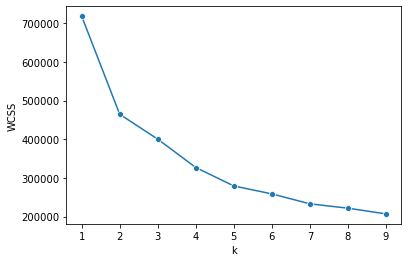

In [104]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

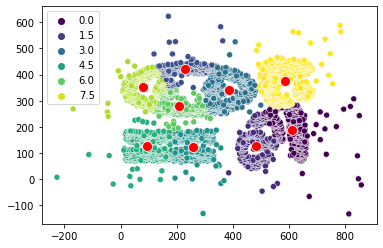

In [143]:
palette=sns.color_palette("viridis", as_cmap=True)

k = 9
centroids, cluster = kmeans(X, k)

sns.scatterplot(X[:,0], X[:, 1], hue=cluster,palette=palette)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')
plt.show()

In [154]:
true = df[2]
purity_score(true,cluster)

0.7100519401161014

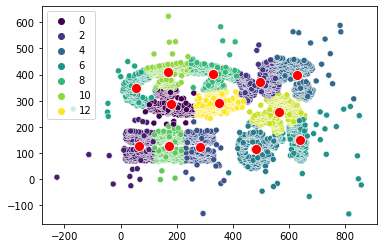

0.6804155209288115

In [155]:
k = 13
centroids, cluster = kmeans(X, k)

sns.scatterplot(X[:,0], X[:, 1], hue=cluster,palette=palette)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='r')
plt.show()
purity_score(true,cluster)

In [196]:
ZSHUT

,1,2,3,4,5,6,7,8,9
0,0.269627,-0.937820,-0.00711,-0.302395,-0.007391,-0.769741,-0.13468,0.314970,2
1,0.000249,0.747064,-0.00711,-1.595103,0.112097,-0.083311,1.91968,1.642380,4
2,0.000249,-0.376192,-0.00711,0.805641,-0.030369,-0.617201,-0.97510,-0.465859,1
3,0.000249,-1.050145,-0.00711,-0.302395,0.075331,0.221769,-0.13468,-0.231610,1
4,0.000249,-0.713169,-0.00711,-0.025386,-0.126878,0.450579,-0.22806,-0.465859,1
...,...,...,...,...,...,...,...,...,...
57995,0.000249,-0.151541,-0.00711,-3.257157,-0.140665,-2.523951,3.22700,3.984867,5
57996,0.000249,-0.488517,-0.00711,-2.518466,0.107501,-0.846011,2.38658,2.423209,4
57997,0.000249,-0.937820,-0.00711,-1.041086,-0.108496,-1.151091,0.65905,1.095800,4
57998,0.000249,1.982645,-0.00711,-0.764077,-0.080922,2.204789,1.59285,0.236887,1


In [243]:
z = df2[[1,2,3,4,5,6,7,8]]
ZSHUT=z.apply(stats.zscore)
ZSHUT[9] = df2[9]

zdata = ZSHUT[[1,2,3,4,5,6,7,8]]
zdata= zdata.values
zdata
#z

array([[ 2.69627492e-01, -9.37819783e-01, -7.11018281e-03, ...,
        -7.69740511e-01, -1.34679698e-01,  3.14970333e-01],
       [ 2.49473239e-04,  7.47063843e-01, -7.11018281e-03, ...,
        -8.33105101e-02,  1.91967997e+00,  1.64237992e+00],
       [ 2.49473239e-04, -3.76191907e-01, -7.11018281e-03, ...,
        -6.17200511e-01, -9.75099563e-01, -4.65858839e-01],
       ...,
       [ 2.49473239e-04, -9.37819783e-01, -7.11018281e-03, ...,
        -1.15109051e+00,  6.59050174e-01,  1.09579950e+00],
       [ 2.49473239e-04,  1.98264517e+00, -7.11018281e-03, ...,
         2.20478949e+00,  1.59285002e+00,  2.36887415e-01],
       [ 2.59045226e-02,  1.42101729e+00, -7.11018281e-03, ...,
         3.74309491e-01, -2.28059683e-01, -3.87775921e-01]])

In [249]:
data =ZSHUT[[1,2,3,4,5,6,7,8]]
data

,1,2,3,4,5,6,7,8
0,0.269627,-0.937820,-0.00711,-0.302395,-0.007391,-0.769741,-0.13468,0.314970
1,0.000249,0.747064,-0.00711,-1.595103,0.112097,-0.083311,1.91968,1.642380
2,0.000249,-0.376192,-0.00711,0.805641,-0.030369,-0.617201,-0.97510,-0.465859
3,0.000249,-1.050145,-0.00711,-0.302395,0.075331,0.221769,-0.13468,-0.231610
4,0.000249,-0.713169,-0.00711,-0.025386,-0.126878,0.450579,-0.22806,-0.465859
...,...,...,...,...,...,...,...,...
57995,0.000249,-0.151541,-0.00711,-3.257157,-0.140665,-2.523951,3.22700,3.984867
57996,0.000249,-0.488517,-0.00711,-2.518466,0.107501,-0.846011,2.38658,2.423209
57997,0.000249,-0.937820,-0.00711,-1.041086,-0.108496,-1.151091,0.65905,1.095800
57998,0.000249,1.982645,-0.00711,-0.764077,-0.080922,2.204789,1.59285,0.236887


In [251]:
k = 3

centroids, cluster = kmeans(zdata, k)


#true2 = ZSHUT[9]
#purity_score(true2,cluster)
cluster

array([2., 0., 0., ..., 2., 1., 1.])

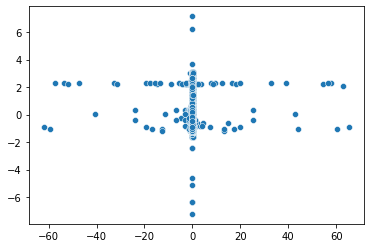

In [204]:
sns.scatterplot(zdata[:,0], zdata[:, 1])
plt.show()

In [255]:
c=data
c[9] = cluster.tolist()
c.loc[c[9]==1]
c

,1,2,3,4,5,6,7,8,9
0,0.269627,-0.937820,-0.00711,-0.302395,-0.007391,-0.769741,-0.13468,0.314970,2.0
1,0.000249,0.747064,-0.00711,-1.595103,0.112097,-0.083311,1.91968,1.642380,0.0
2,0.000249,-0.376192,-0.00711,0.805641,-0.030369,-0.617201,-0.97510,-0.465859,0.0
3,0.000249,-1.050145,-0.00711,-0.302395,0.075331,0.221769,-0.13468,-0.231610,2.0
4,0.000249,-0.713169,-0.00711,-0.025386,-0.126878,0.450579,-0.22806,-0.465859,2.0
...,...,...,...,...,...,...,...,...,...
57995,0.000249,-0.151541,-0.00711,-3.257157,-0.140665,-2.523951,3.22700,3.984867,0.0
57996,0.000249,-0.488517,-0.00711,-2.518466,0.107501,-0.846011,2.38658,2.423209,2.0
57997,0.000249,-0.937820,-0.00711,-1.041086,-0.108496,-1.151091,0.65905,1.095800,2.0
57998,0.000249,1.982645,-0.00711,-0.764077,-0.080922,2.204789,1.59285,0.236887,1.0


<AxesSubplot:>

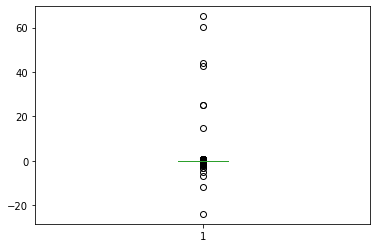

In [264]:
box1 =c.loc[c[9]==0]
box1[1].plot(kind='box')

<AxesSubplot:>

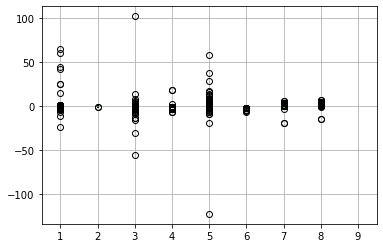

In [275]:
#sns.boxplot(box1[1])
box1.boxplot(widths=0.01,  showbox=True, whiskerprops={'lw': 0})



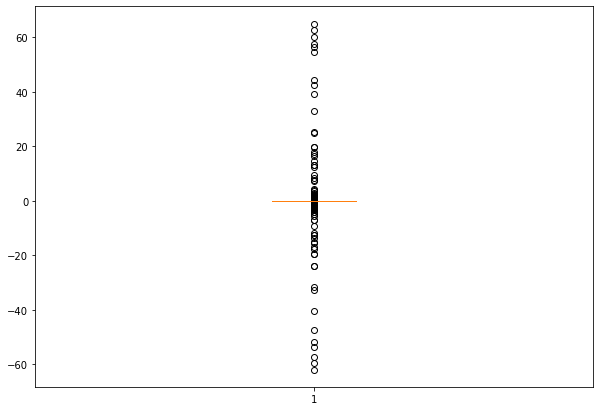

In [284]:
 
fig = plt.figure(figsize =(10, 7))
l = ZSHUT[1].values
 
# Creating plot
plt.boxplot(l)
#boxplot([1,2,3,4,5,10], showfliers=False)
 
# show plot
plt.show()

In [286]:
l.plot

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

AttributeError: 'Line2D' object has no property 'kind'

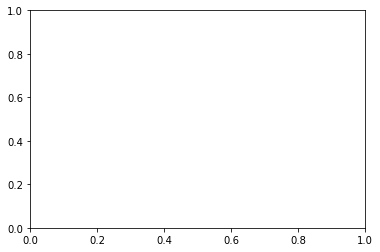

In [290]:
plt.plot(l,kind='box')

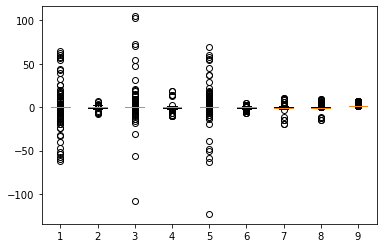

In [297]:
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10, 4),
                  columns=['Col1', 'Col2', 'Col3', 'Col4'])

plt.figure()
plt.boxplot(df.values)
plt.show()

In [303]:
l.min()

-61.84124712326277